Visualizing Dummy Data

Dummy data

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([3, 6, 13, 28, 55])

Linear Regression

In [42]:
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

Polynomial Regression(degree 2)

In [43]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

Plot

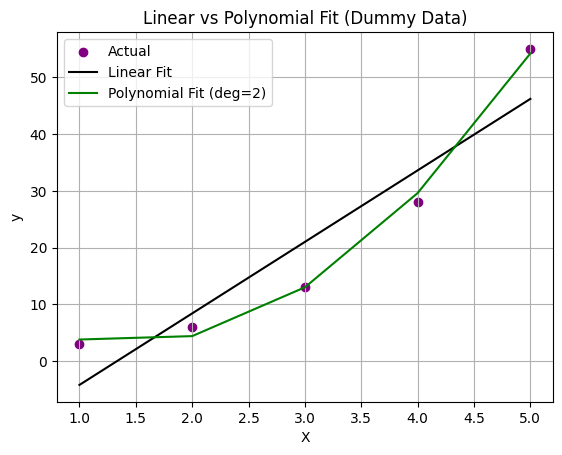

In [44]:
plt.scatter(X, y, color='purple', label='Actual')
plt.plot(X, y_pred_linear, label='Linear Fit', color='black')
plt.plot(X, y_pred_poly, label='Polynomial Fit (deg=2)', color='green')
plt.title("Linear vs Polynomial Fit (Dummy Data)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Real Dataset:Salary prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [49]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


Train-test split

In [50]:
X = df[["Years of Experience"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

Train linear regression

In [52]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

Metrics

In [55]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression:")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("R2 Score:", r2_lin)

Linear Regression:
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 Score: 0.6669549610495003


Polynomial Rgression (Drdees 2 and 4)

Degree 2

In [51]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

poly2_model = LinearRegression()
poly2_model.fit(X_train_poly2, y_train)
y_pred_poly2 = poly2_model.predict(X_test_poly2)


Metrics

In [56]:
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
rmse_poly2 = np.sqrt(mse_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

Degree4

In [57]:
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train)
X_test_poly4 = poly4.transform(X_test)

poly4_model = LinearRegression()
poly4_model.fit(X_train_poly4, y_train)
y_pred_poly4 = poly4_model.predict(X_test_poly4)

Metrics

In [58]:
mse_poly4 = mean_squared_error(y_test, y_pred_poly4)
rmse_poly4 = np.sqrt(mse_poly4)
r2_poly4 = r2_score(y_test, y_pred_poly4)

print("\nPolynomial Regression (Degree 2):")
print("MSE:", mse_poly2)
print("RMSE:", rmse_poly2)
print("R2 Score:", r2_poly2)

print("\nPolynomial Regression (Degree 4):")
print("MSE:", mse_poly4)
print("RMSE:", rmse_poly4)
print("R2 Score:", r2_poly4)


Polynomial Regression (Degree 2):
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963

Polynomial Regression (Degree 4):
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


visualization of all models

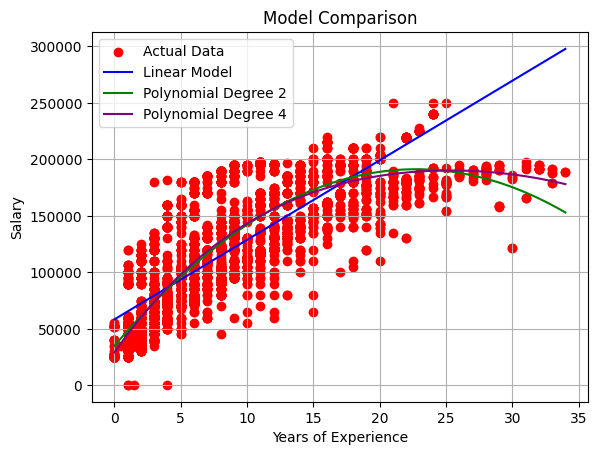

In [59]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

X_range_df = pd.DataFrame(X_range, columns=["Years of Experience"])

X_range_poly2 = poly2.transform(X_range_df)
X_range_poly4 = poly4.transform(X_range_df)

y_range_lin = lin_model.predict(X_range_df)
y_range_poly2 = poly2_model.predict(X_range_poly2)
y_range_poly4 = poly4_model.predict(X_range_poly4)

plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_range, y_range_lin, label='Linear Model', color='blue')
plt.plot(X_range, y_range_poly2, label='Polynomial Degree 2', color='green')
plt.plot(X_range, y_range_poly4, label='Polynomial Degree 4', color='purple')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Model Comparison")
plt.legend()
plt.grid(True)
plt.show()


Model performance comparison

In [60]:
metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial (Degree 2)", "Polynomial (Degree 4)"],
    "MSE": [mse_lin, mse_poly2, mse_poly4],
    "RMSE": [rmse_lin, rmse_poly2, rmse_poly4],
    "R2 Score": [r2_lin, r2_poly2, r2_poly4]
})

metrics_df.style.format({
    "MSE": "{:.2f}",
    "RMSE": "{:.2f}",
    "R2 Score": "{:.4f}"
})


,Model,MSE,RMSE,R2 Score
0,Linear Regression,946833177.71,30770.65,0.6670
1,Polynomial (Degree 2),726857249.72,26960.29,0.7443
2,Polynomial (Degree 4),720033651.69,26833.44,0.7467
